![image](https://mattamyhomes.com/~/media/images/mattamywebsite/corp/home/heroslideshow/usa/orlando/orl_geohero_03_1600x800.jpg)

## <span style='color:Green'> House Price Prediction  </span>

Getting the perfect price of the house needs study of various factors like location of house, Total area of the house, No. of bedrooms, Overall condition of the house, how old it is, it's proximity to schools, travel stations, etc.  

To do this, let us first explore the dataset and get to know all the fields in it. This is how we will gain detail knowledge of all the fields and their relation with each other.  
Also, it will help us to important fields which has major impact on the price of the house.  

Here, the dataset is available in **two CSV files (train.csv & test.csv)**. We will combine the datasets for study and analyse complete data.

In [1]:
# Import Required Libraries
# For dataset reading and manipulating
import numpy as np
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats import boxcox_normmax

# Pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

# Train Test Split
from sklearn.model_selection import train_test_split

# Cross-Validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV

# For Modelling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV, LassoCV, RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVC, SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from mlxtend.regressor import StackingCVRegressor
from sklearn.pipeline import make_pipeline

# Regularization
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Basic Layout details of Visualizations
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (15, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': small,
          'ytick.labelsize': small,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")

In [3]:
# Read House Price Train Datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
# Let's check the shape and data types in train set
print('Train set {} & Test set {}'.format(df_train.shape, df_test.shape))

Train set (1460, 81) & Test set (1459, 80)


There are total **1460** records in Train and **1459** records in Test for **81 fields**.  

In [5]:
# Check the details about datatype of the fields in dataset
# Train set
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

Data type for fields **MSSubClass, MoSold, YrSold, GarageYrBlt, YearBuilt & YearRemodAdd** does not look correct. These fields contain numerical data but the information provided is categorical.  
Let us check if it is same for test data as well.

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

#### It is same. Let us first combine both the datasets and study together.

In [7]:
# Dropping the "Id" from train and test set. 
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)

# Saving the target values in "y". 
y = df_train['SalePrice'].reset_index(drop=True)

# Concatinate both the datasets
df_data = pd.concat([df_train, df_test], sort=False).reset_index(drop=True)
# Drop Sale Price from df_data 
df_data.drop('SalePrice', axis=1, inplace=True)

In [8]:
# Check updated shape of the dataset
df_data.shape

(2919, 79)

In [9]:
# Update the datatypes of identified fields
df_data['MSSubClass']   = df_data['MSSubClass'].apply(str)
df_data['YrSold']       = df_data['YrSold'].astype(str)
df_data['MoSold']       = df_data['MoSold'].astype(str)
#df_data['GarageYrBlt']  = df_data['GarageYrBlt'].astype(str)
#df_data['YearBuilt']    = df_data['YearBuilt'].astype(str)
#df_data['YearRemodAdd'] = df_data['YearRemodAdd'].astype(str)

Rest of the data types looks fine.  
Let's describe the dataset and check the values in dataset.

In [10]:
df_detail = df_data.describe(include='all')
df_detail

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,2919,2915,2433.000000,2919.000000,2919,198,2919,2919,2917,2919,...,2919.000000,2919.000000,10,571,105,2919.000000,2919,2919,2918,2919
unique,16,5,NaN,NaN,2,2,4,4,2,5,...,NaN,NaN,3,4,4,NaN,12,5,9,6
top,20,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,Inside,...,NaN,NaN,Ex,MnPrv,Shed,NaN,6,2007,WD,Normal
freq,1079,2265,NaN,NaN,2907,120,1859,2622,2916,2133,...,NaN,NaN,4,329,95,NaN,503,692,2525,2402
mean,NaN,NaN,69.305795,10168.114080,NaN,NaN,NaN,NaN,NaN,NaN,...,16.062350,2.251799,NaN,NaN,NaN,50.825968,NaN,NaN,NaN,NaN
std,NaN,NaN,23.344905,7886.996359,NaN,NaN,NaN,NaN,NaN,NaN,...,56.184365,35.663946,NaN,NaN,NaN,567.402211,NaN,NaN,NaN,NaN
min,NaN,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,59.000000,7478.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,68.000000,9453.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,80.000000,11570.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN


After combining, we have total **2919 records and 80 fields** and from above stats, we can see that fields like **LotFrontage**, **Alley**, **PoolQC**, **Fence**, etc. are not having perfect count, more than 80% of data is missing.  

We will study both the type of fields (Categorical & Numerical) separately and check relations with Sale Price of the house.  

Let us first check the distribution of Sale Price in the dataset.

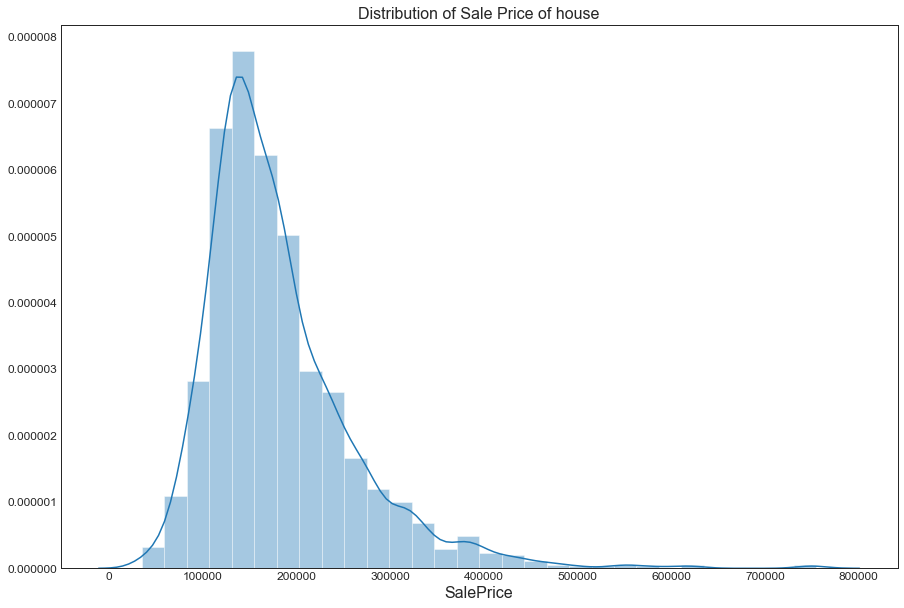

In [11]:
# Sale Price
sns.distplot(df_train['SalePrice'], bins=30)
plt.title('Distribution of Sale Price of house')

plt.show()

Here, we can see that the SalePrice is not normally distributed, but it is positively skewed. This means most of the houses were sold by less than the average price.  

Now, **Skewness** is the degree of distortion from the symmetrical bell curve or the normal curve. For normal distribution, the Skewness should near to **zero**.  
  
While **Kurtosis** According to Wikipedia,
*In probability theory and statistics, Kurtosis is the measure of the "tailedness" of the probability distribution of a real-valued random variable.*  
So, In other words it is the measure of the extreme values(outliers) present in the distribution.  
     
Let us check the **Skewness and Kurtosis of the Sale Price.**

In [12]:
# Check Skewness & Kurtosis
print('Skewness of Sale Price is {}'.format(df_train['SalePrice'].skew()))
print('Kurtosis of Sale Price is {}'.format(df_train['SalePrice'].kurt()))

Skewness of Sale Price is 1.8828757597682129
Kurtosis of Sale Price is 6.536281860064529


This skewness can be fixed by different Transformations. We will do this after right before selecting the features for our model.   

Now, let us check the relation of rest of the fields with Sale Price.  
Best way to do that is get it on **Heat Map**. 

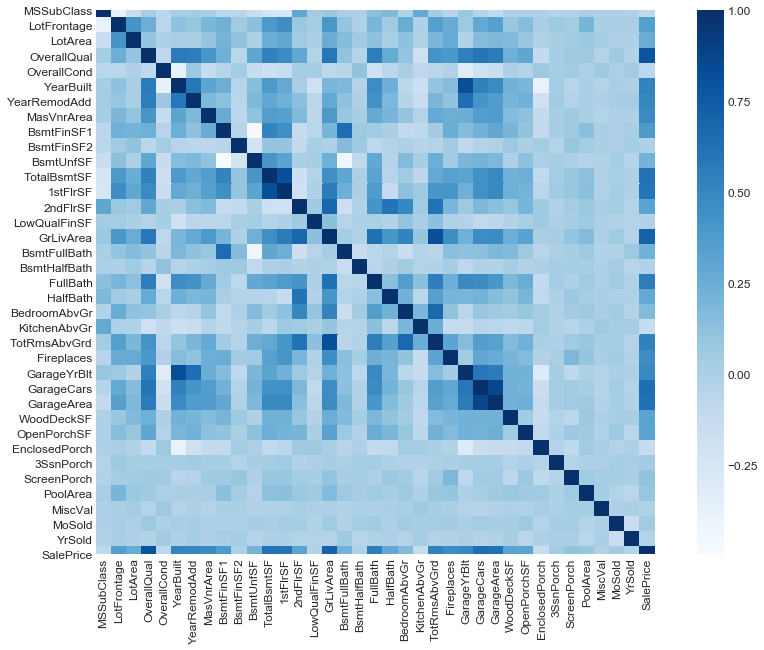

In [13]:
# Visualize correlation on Heat Map
sns.heatmap(df_train.corr(), cmap='Blues', square=True)

plt.show()

Heat Map is one of the best way to visualize the correlation between the independent fields and Target field.  
We can also check multicorrelations amongst the independent fields, if any.  

From above graph, we can have following observations:  
1. Independent fields like **OverallQual**, **GrLivArea**, **GarageCars**, **GarageArea**, etc have very good correlation with target field Sale Price.  
2. Also, we can see multi-correlation amongst fields like **GrLivArea & TotRmsAbvGrd**, **YearBuilt & GarageYrBuilt**, **GarageCars & GarageArea**, **1stFlrSF & TotalBsmtSF**, etc.  

#### Let's get the numbers for the top 10 correlated fields with the target field 'Sale Price'.

In [14]:
# Get top 10 Correlated fields
df_train.corr()['SalePrice'].sort_values(ascending=False)[:10]

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
Name: SalePrice, dtype: float64

Let's visualize some of the top fields vs Sale Price on Pair Plot (Scatter Plot)

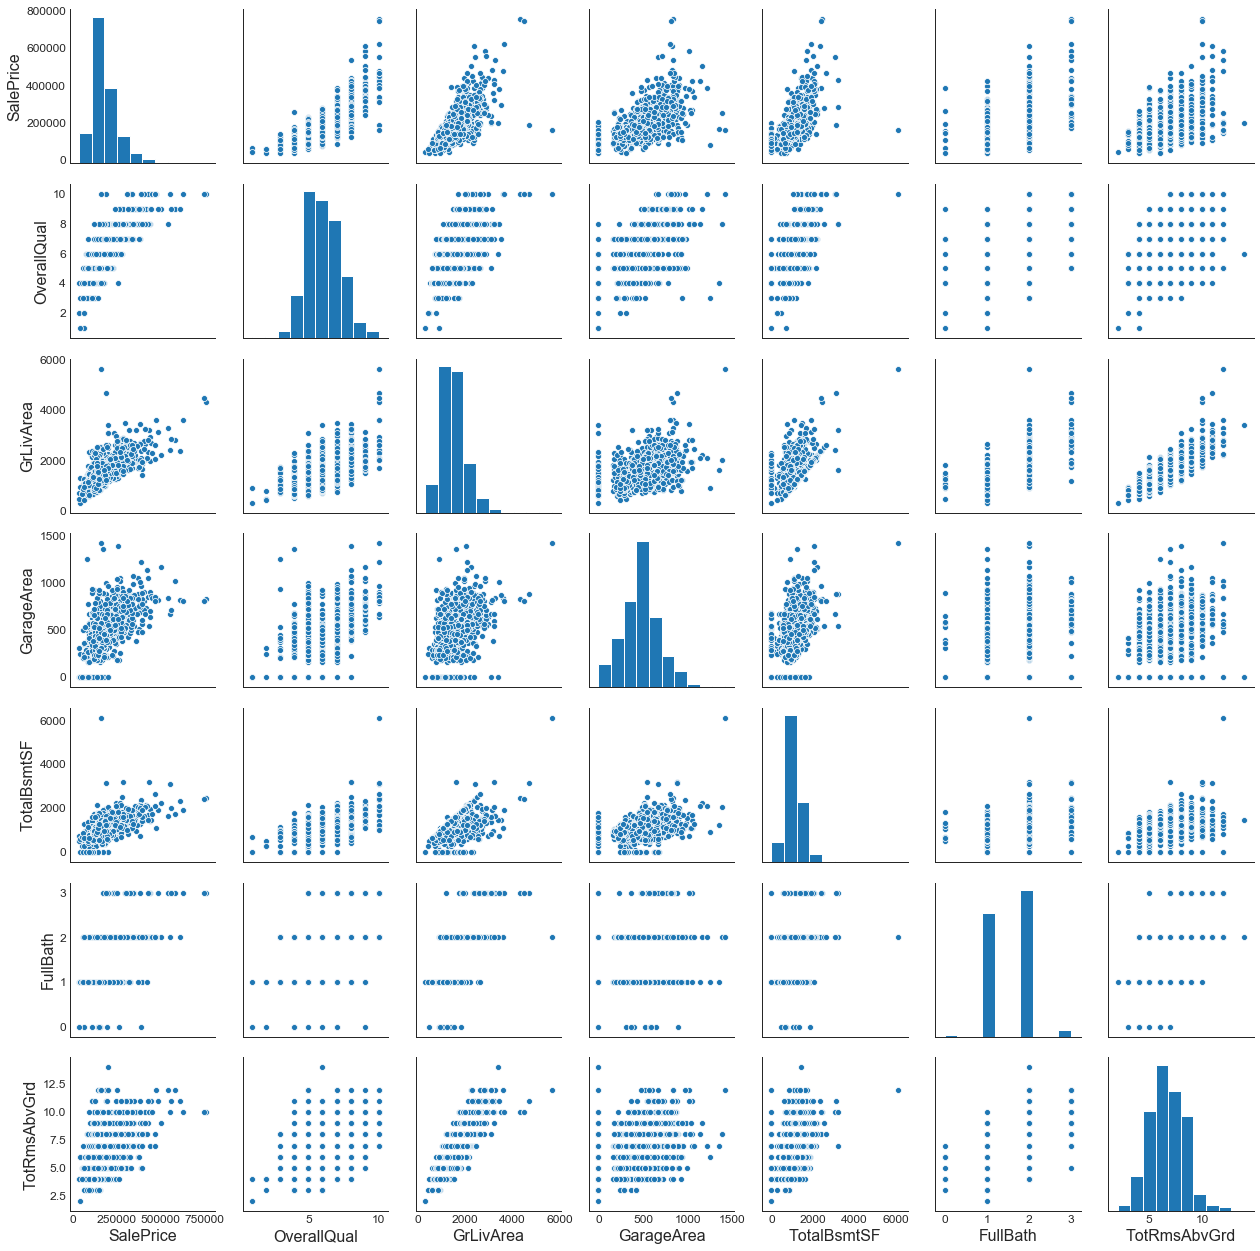

In [15]:
# Let us visualize them together with the help of pair plot.
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', 'FullBath', 'TotRmsAbvGrd']

sns.pairplot(df_train[cols], kind='scatter')

plt.show()

Let's figure each field selected and check it's relation with Sale Price

1. **Overall Quality:** From above scatter plot, the Sale Price increases almost exponentially with Overall Qaulity.  

2. **GrLivArea:** Here, we can see a good positive corelation with the Sale Price and looks like Sale Price increases linearly with Ground Livining Area. Also, there is good correlation between **GrLivArea** & **TotalRmsAbvGrd**. So, we can keep either of the field in our model.  

3. **GarageArea:** Definitely there is no linear relation with Sale Price but the price seems to increase with the Garage Size. Also, as the garage size increases, the no. of cars that would fit in will also increase. This proves the perfect correlation between this field and **GarageCars** and similarly, we can just select either of these fields in our model.   

4. **TotalBsmtSF:** As the surface area of basement increases i.e. bigger house, the Sale Price increases.

5. **FullBath:** Here also, as the number of full bathrooms increase, both sales count as well as houses wih higher prices starts getting included.  

Another important observation in these are the **'Outliers'** and we can see in almost all the fields.  
Let's study them closely.

#### Overall Quality vs Sale Price

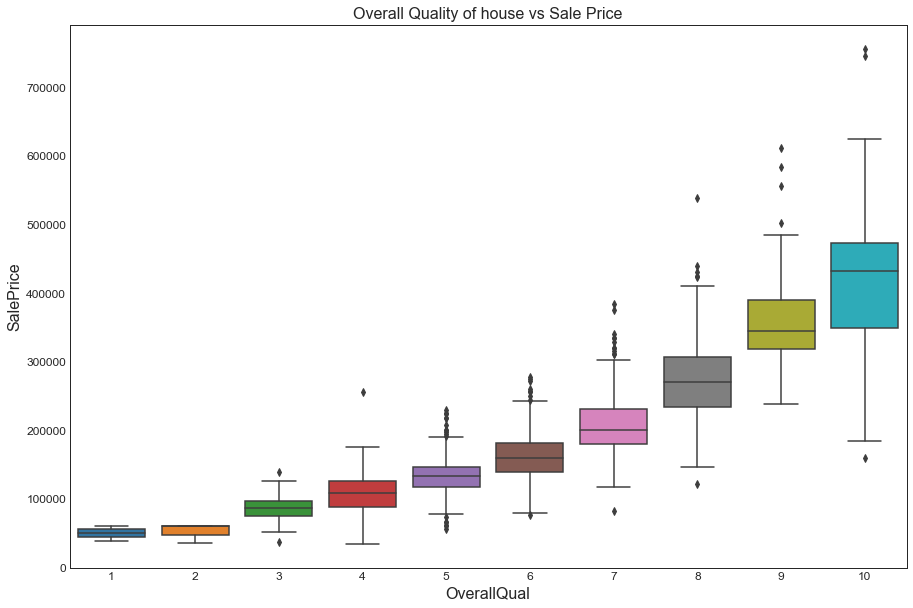

In [16]:
sns.boxplot(df_train['OverallQual'], df_train['SalePrice'])
plt.title('Overall Quality of house vs Sale Price')

plt.show()

We can clearly see that the Price of house increases with Overall Quality of the house as well as the number of houses sold are incerasing with Overall Quality of the house.  
The outliers are seen for the house with Overall Quality '4' and '10'.

Let us now have a look at the house type. Field **MSSubCLass** describes the type of house. (from **Data_description.txt** file)  
#### MSSubClass vs Sale Price

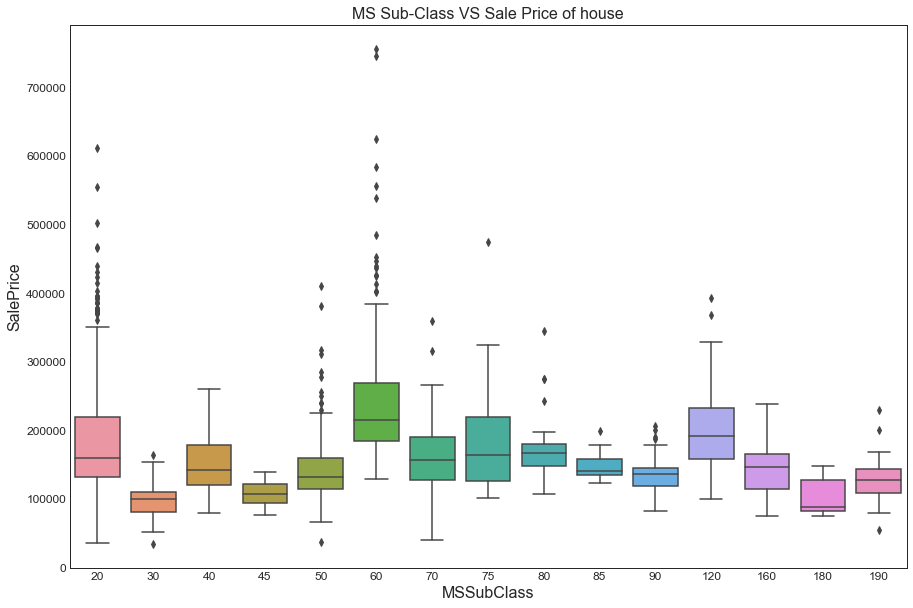

In [17]:
sns.boxplot(df_train['MSSubClass'], df_train['SalePrice'])
plt.title('MS Sub-Class VS Sale Price of house')

plt.show()

From above Boxplot, we can observe following points:  
1. For each Sub-Class, the price of house differs significantly.    
2. Also, there are many outliers, which will make it difficult to figure out any pattern for the variation of Sale Price.  

#### Neighborhood vs Sale Price

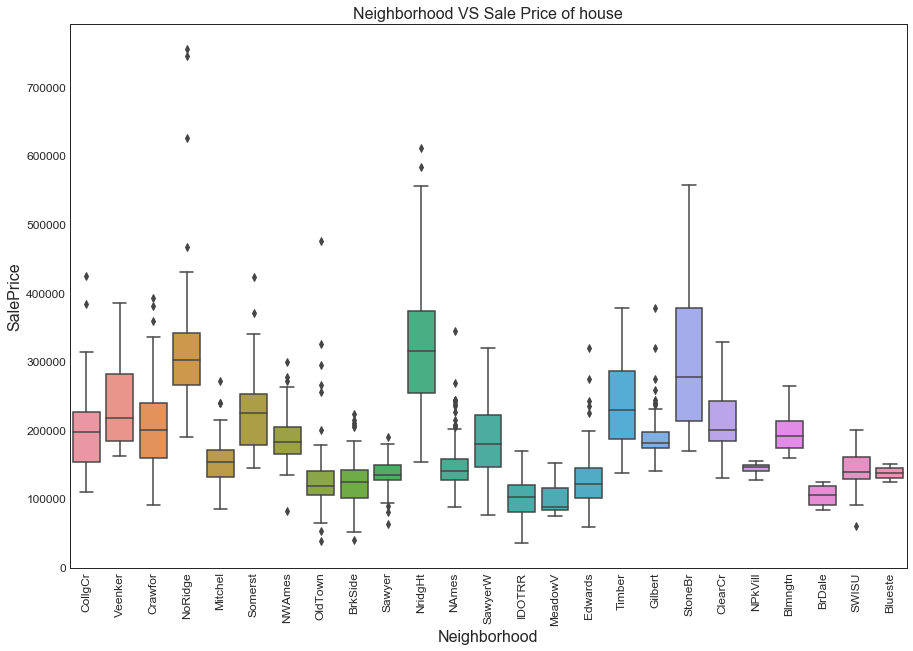

In [18]:
# Plotting Neighborhood vs Sale Price
sns.boxplot(df_train['Neighborhood'], df_train['SalePrice'])
plt.title('Neighborhood VS Sale Price of house')
plt.xticks(rotation=90)

plt.show()

Similar as that of Sub Class i.e. lot of variations but no any pattern and lots of outliers.  

#### Year Built vs Sale Price

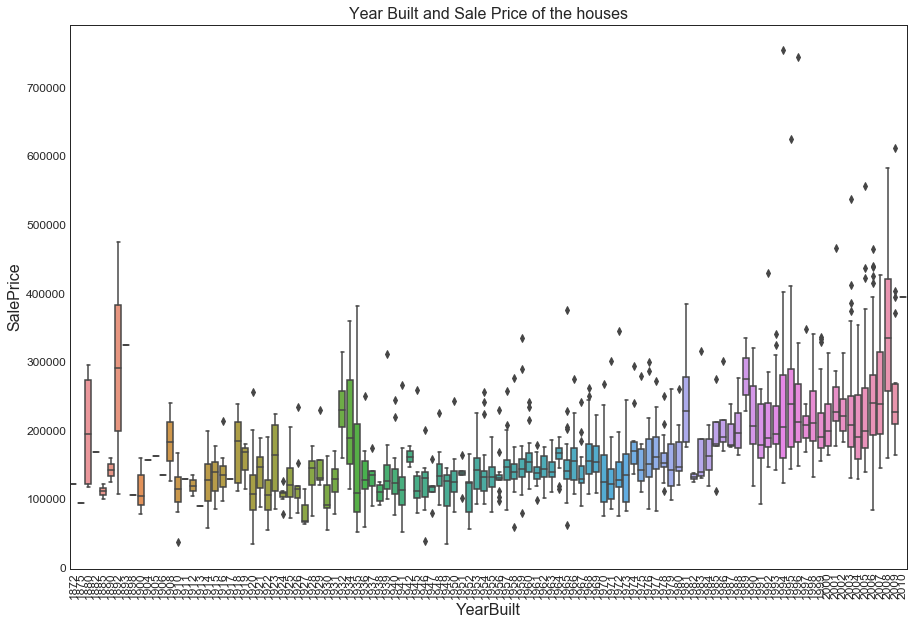

In [19]:
# Plotting Year Built vs Sale Price
sns.boxplot(df_train['YearBuilt'], df_train['SalePrice'])
plt.title('Year Built and Sale Price of the houses')
plt.xticks(rotation=90)

plt.show()

Here, we can see that the new houses are having slightly higher price as compared to the old houses, but again with some exceptions (The famous Outliers) are there.  

Let us first fill all the missing data and then again study the patterns and handle the outliers.  

#### Missing Data

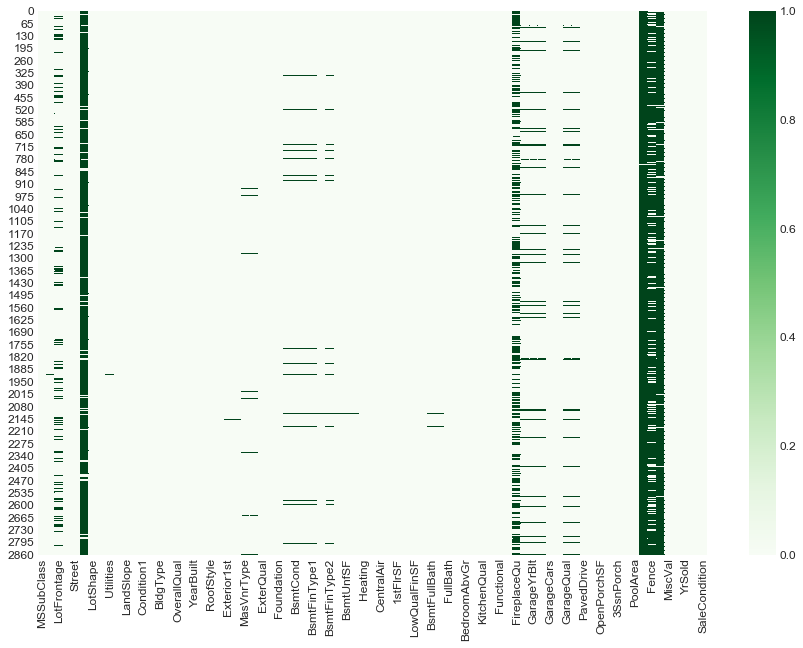

In [20]:
# Visulaize missing data in combined set with the help of heatmap
sns.heatmap(df_data.isnull(), cmap='Greens')

plt.show()

Looks like fields like **Alley**, **FireplaceQu**, **PoolQC**, **Fence** & **MiscFeature** are missing more than 80% of the data. Let us check the percentage of missing values right away.

In [21]:
# Missing values percentage
def missing_info(df):
    # Calculate total count
    total = df.isnull().sum().sort_values(ascending=False)[df.isnull().sum()!= 0]
    
    # Calculate Percent
    percent = round(df.isnull().sum().sort_values(ascending=False)/len(df)*100,2)[df.isnull().sum()!=0]
    
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [22]:
missing_info(df_data)

,Total,Percent
PoolQC,2909,99.66
MiscFeature,2814,96.40
Alley,2721,93.22
Fence,2348,80.44
FireplaceQu,1420,48.65
LotFrontage,486,16.65
GarageCond,159,5.45
GarageQual,159,5.45
GarageYrBlt,159,5.45
GarageFinish,159,5.45


**Observations Time..!!**    
  
Here, **PoolQC has 99.66%** missing data while **MiscFeature has the 2nd most missing data i.e. 96.40%** and after this it is **Alley on 93.22%**.  
  
Also, we can see that there are around 18 fields like **MSZoning**, **Utilities**, **Exterior1st**, **Exterior2nd**, etc which are having less than 1% data.

Let us visualize top 10 fields with missing data on bar chart along with their percentage.

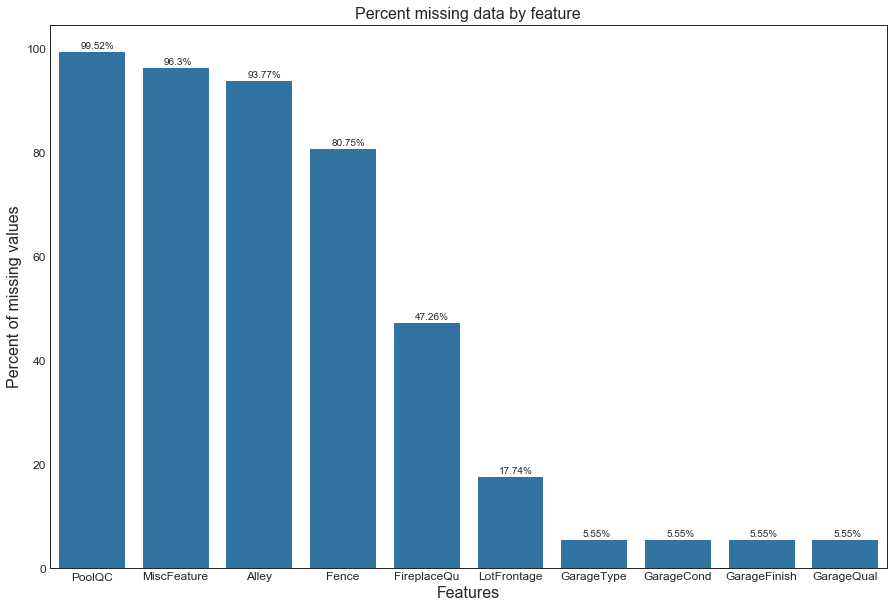

In [23]:
# Let's plot these missing values(%) vs column_names
missing_values_count = (df_train.isnull().sum() / df_train.isnull().count()*100).sort_values(ascending=False)

base_color = sns.color_palette()[0]
plt.xlabel('Features')
plt.ylabel('Percent of missing values')
plt.title('Percent missing data by feature')

ax = sns.barplot(missing_values_count[:10].index.values, missing_values_count[:10], color = base_color)

# Adding annotations 
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{}%'.format(round(height,2)), (x + width/3, y + height + 0.5))

plt.show()

Let's get rid of these fields with more than 80% missing data like **'PoolQC'**, **'MiscFeature'**, **'Alley'** & **'Fence'** permanently.

In [24]:
# Drop the columns
df_data.drop(['PoolQC','MiscFeature','Alley','Fence'], axis=1, inplace=True)

**Data_description.txt** describes the nature of data expected in each field. Looking at this file we understood following points:  
1. For numerical variables, if the there are no value mentioned then the data present in the file should be **'0'** i.e. zero.   
  
2. Maximum of categorical fields are missing because they are not applicable for that house and hence the missing values can be replaced by **'NA'**.
  
3. For some categorical fields, filling with **NA is not an option**. For eg. **Electrical** connection should be present in each and every house as it is a basic need. For such fields, we will replace the missing value with most common category of data.  

In [25]:
# FireplaceQu
# The houses with no fireplaces have null values in Fireplace Quality. So, we will replace them by 'NA'.
df_data['FireplaceQu'].fillna('NA', inplace=True)

# LotFrontage
# Replaced all missing values in LotFrontage by imputing the median value of each neighborhood.
df_data['LotFrontage'] = df_data.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))

# Garage
# From above report, the count for no garage house is zero i.e. null values. Replace these null values as 'NA'.
df_data.fillna({'GarageFinish':'NA', 'GarageQual':'NA', 'GarageCond':'NA', 'GarageType':'NA', 'GarageYrBlt':0, 'GarageCars':0, 'GarageArea':0}, inplace=True)

# Basement
# If the value is Nan, there is no basment and hence will replace it with 'NA'
df_data.fillna({'BsmtQual':'NA', 'BsmtCond':'NA', 'BsmtExposure':'NA', 'BsmtFinType1':'NA', 'BsmtFinType2':'NA', }, inplace=True)
df_data.fillna({'BsmtFinSF1':0, 'BsmtFinSF2':0, 'BsmtUnfSF':0, 'TotalBsmtSF':0, 'BsmtFullBath':0, 'BsmtHalfBath':0}, inplace=True)

# MasVnrType & MasVnrArea
# Replace Null values for 'MasVnrType' with 'None' and Area with 0.
df_data.fillna({'MasVnrType':'None', 'MasVnrArea':0}, inplace=True)

# MSZoning 
# Replace null values with the most common values
df_data['MSZoning'].fillna(df_data['MSZoning'].mode()[0], inplace=True)

# Utilities
# Filling null values with most common Utilities
df_data['Utilities'].fillna(df_data['Utilities'].mode()[0], inplace=True)

# Functional
df_data['Functional'].fillna(df_data['Functional'].mode()[0], inplace=True)

# Kitchen Quality
df_data['KitchenQual'].fillna(df_data['KitchenQual'].mode()[0], inplace=True)

# Exterior
# Replacing null values with most common Exterior
df_data['Exterior1st'].fillna(df_data['Exterior1st'].mode()[0], inplace=True)
df_data['Exterior2nd'].fillna(df_data['Exterior2nd'].mode()[0], inplace=True)

# Sale Type
# Fill the null values with most common Sale Type
df_data['SaleType'].fillna(df_data['SaleType'].mode()[0], inplace=True)

# Electrical
df_data['Electrical'].fillna(df_data['Electrical'].mode()[0], inplace=True)

In [26]:
# Check if have filled all the missing values
missing_info(df_data)

,Total,Percent


**Bingo!! No Missing data..**   

Our next step will be to check the duplicate data and common data in fields.  
This is necessary so that we can get rid of the fields which are having amost the same data. Such fields do not have any impact on the target field, in our case 'Sale Price'.

So, we will check such fields with 95% and more common data and then decide if we can keep that field which creating model or not.  
Let us list out the fileds first.

In [27]:
# Let's first get copy of this data in csv file..
df_data.to_csv('Clean_all_data.csv')

In [27]:
# Checking for fields with 95% similar data
common_data_col = []
for col in df_data.columns:
    pct = (df_data[col].value_counts() / len(df_data.index)).iloc[0]
    
    if pct >= 0.95:
        common_data_col.append(col)
        print('Feature {0} : {1:.2f}% '.format(col, pct*100))

Feature Street : 99.59% 
Feature Utilities : 99.97% 
Feature LandSlope : 95.17% 
Feature Condition2 : 98.97% 
Feature RoofMatl : 98.53% 
Feature Heating : 98.46% 
Feature LowQualFinSF : 98.63% 
Feature KitchenAbvGr : 95.41% 
Feature 3SsnPorch : 98.73% 
Feature PoolArea : 99.55% 
Feature MiscVal : 96.47% 


Let us get rid of these fields which has more than 99% common data, as these will not help us much in getting Sale Price of the house.

In [28]:
# Dropping above fields
df_data.drop(['Street', 'Utilities', 'PoolArea'], axis=1, inplace=True)
df_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclo

After this we will check the outliers in our Target field **'Sale Price'** and study it.  

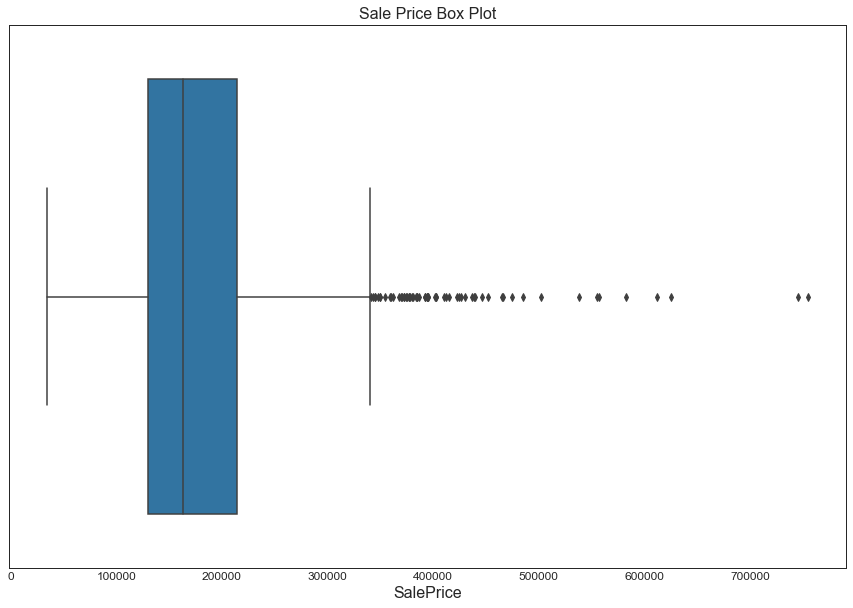

In [29]:
sns.boxplot(df_train['SalePrice'])
plt.title('Sale Price Box Plot')

plt.show()

From above boxplot, we can see that there are two houses with extremly high price (greater than $700K).  
Generally, houses can go to this high price if they are very big i.e. with many bedrooms or including all amenities, etc. Let's check data for these records.

In [30]:
df_train[df_train['SalePrice']>700000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
691,60,RL,104.0,21535,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,755000
1182,60,RL,160.0,15623,Pave,NaN,IR1,Lvl,AllPub,Corner,...,555,Ex,MnPrv,NaN,0,7,2007,WD,Abnorml,745000


From above data and graphs we have seen, these 2 houses have the Best Overall Quality, Maximum Ground Living Area, Year Built was between 1993 & 1996, both were sold in 2007, etc.  
We can keep these as exceptional records and deal with them later.  

Also, We have earlier noted that the Sale Price is not normally distributed and such data may not help in getting accurate Linear Regression Model.  
As the data is positively skewed, let's visualize Log Normal Distribution of Sale Price.

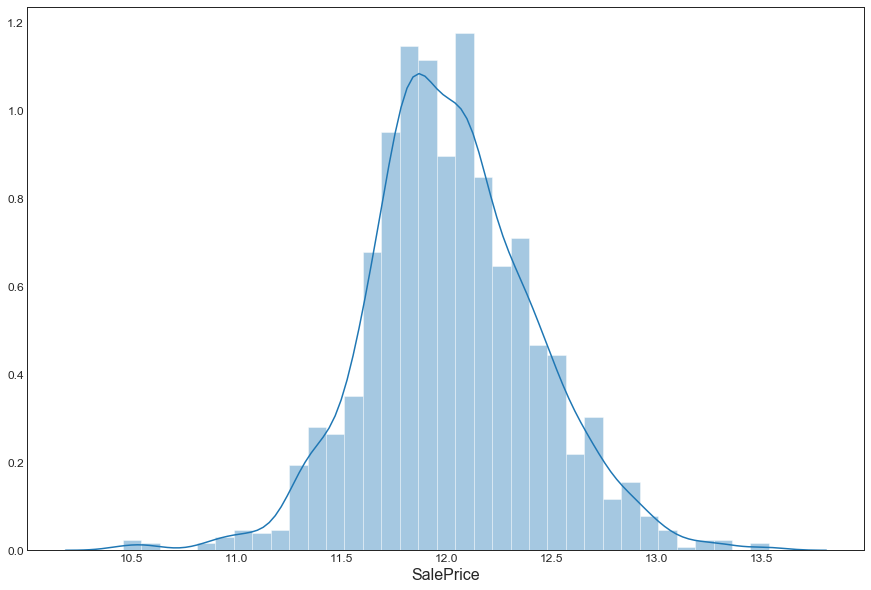

In [31]:
sns.distplot(np.log1p(df_train["SalePrice"]))

Now the Sale Price looks normally distributed. Let us transform this target field.

In [32]:
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

Now, let us also check Skewness of all the numeric fields in our data.  
Let's list out the numerical and categorical columns with missing data.

In [33]:
# Initialize list for field names
num_data = []
cat_data = []
     
# Divide list in 2 lists
for col in df_data.columns:
    if df_data[col].dtype is pd.np.dtype(object):
        cat_data.append(col)
    else:
        num_data.append(col)

print('Numeric Fields: {}'.format(num_data))
print('\nCategorical Fields: {}'.format(cat_data))

Numeric Fields: ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']

Categorical Fields: ['MSSubClass', 'MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'MoSold',

In [34]:
# Skewness & Kurtosis of Numeric Fields in data
def normality_check(df, data_list):
    skewness = []
    kurtosis = []
    
    for col in data_list:
        # Calculate Skewness
        skewness.append(df[col].skew()) 
    
        # Calculate Kurtosis
        kurtosis.append(df[col].kurt())
    
    return pd.DataFrame(list(zip(skewness,kurtosis)), index=data_list, columns=['Skewness', 'Kurtosis'])

In [35]:
# Check Skewness and Kurtosis
normality_check(df_data,num_data)

,Skewness,Kurtosis
LotFrontage,1.461180,12.763789
LotArea,12.829025,264.952310
OverallQual,0.197212,0.067219
OverallCond,0.570605,1.479447
YearBuilt,-0.600114,-0.511317
YearRemodAdd,-0.451252,-1.346431
MasVnrArea,2.614936,9.336415
BsmtFinSF1,1.425963,6.904047
BsmtFinSF2,4.148275,18.844397
BsmtUnfSF,0.919812,0.403503


From this, we can see hardly few fields seems to have skewness equal to zero while rest are not normally distributed.  
Let us fix the skewness of these fields with the help of box-cox transformation.

In [36]:
# Function to fix skewness of data
def skew_fix(df, data_list):
    "Fix skewness of Numeric Columns"
    "Accepts Data Frame and numeric column list"
    
    # Check skewness > 0.5 and transform with optimal Box-Cox transform parameter
    for col in data_list:
        if abs(df[col].skew()) > 0.5:
            df[col] = boxcox1p(df[col], boxcox_normmax(df[col] + 1))

In [37]:
# Fix the Skewness of data
skew_fix(df_data, num_data)

Now, we have fixed all the skewness in data. It's time to do some **Feature Engineering** to create some more fields to boost the predictive power of our Model.

In [38]:
# Summing up some of the numeric values
df_data['TotalSF'] = df_data['TotalBsmtSF'] + df_data['1stFlrSF'] + df_data['2ndFlrSF']

df_data['YrBltAndRemod'] = df_data['YearBuilt'] + df_data['YearRemodAdd']

df_data['Total_sqrft'] = (df_data['BsmtFinSF1'] + df_data['BsmtFinSF2'] +
                                 df_data['1stFlrSF'] + df_data['2ndFlrSF'])

df_data['Total_Bath'] = (df_data['FullBath'] + (0.5 * df_data['HalfBath']) +
                               df_data['BsmtFullBath'] + (0.5 * df_data['BsmtHalfBath']))

df_data['Total_porchsf'] = (df_data['OpenPorchSF'] + df_data['EnclosedPorch'] + df_data['ScreenPorch'] +
                              df_data['WoodDeckSF'])

In [39]:
# Considering Amenities of house
df_data['has2ndfloor'] = df_data['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
df_data['hasgarage'] = df_data['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
df_data['hasbsmt'] = df_data['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
df_data['hasfireplace'] = df_data['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)

Now that we have created the new fields, let's check the shape of the new DataFrame.

In [40]:
df_data.shape

(2919, 81)

### Creating Dummy Variables

In [41]:
all_data = pd.get_dummies(df_data).reset_index(drop=True)
all_data.shape

(2919, 319)


Separate the Train and Test records.

In [42]:
y = df_train['SalePrice']

X = all_data.iloc[:len(y), :]

org_test = all_data.iloc[len(y):, :]

print(X.shape, y.shape, org_test.shape)

(1460, 319) (1460,) (1459, 319)


### Create Train Test Set
Split the training data again in Train-test Set

In [43]:
# Split the data in Train Test Set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .8, random_state = 4)

In [44]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(1168, 319) (1168,) (292, 319) (292,)


### Create Basic Model
Let us start with the simple Linear Regression Model

In [45]:
# Create Linear Regression
lin_reg = LinearRegression(n_jobs=-1)

In [46]:
# Fit the model with train data
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

In [47]:
# Check Score (R^2 value)
print(lin_reg.score(X_test, y_test))

0.42396849005943676


In [48]:
# Predict 
yhat = lin_reg.predict(X_test)

In [49]:
# Root Mean Squared Error
print('Root Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_test, yhat))))
print('Mean Squared Error: {}'.format(mean_squared_error(y_test, yhat)))
print('R2 Score: {}'.format(r2_score(y_test, yhat)))

Root Mean Squared Error: 0.2875466582036992
Mean Squared Error: 0.082683080644115
R2 Score: 0.4239684900594367


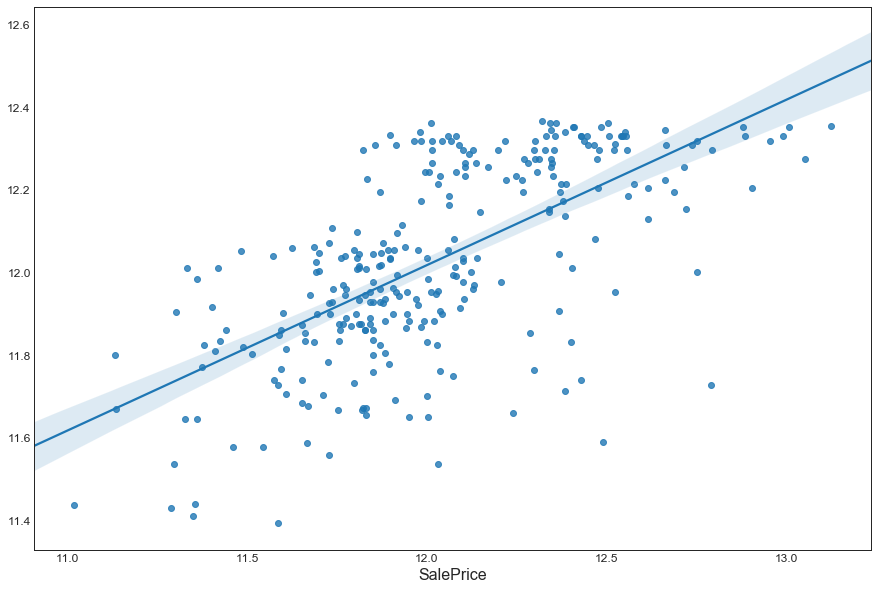

In [50]:
sns.regplot(y_test, yhat)
plt.show()

### Cross Validation

In [51]:
lin_creg = LinearRegression()
cv = KFold(shuffle=True, random_state=2, n_splits=10)
scores = cross_val_score(lin_reg, X, y, cv = cv, scoring = 'neg_mean_absolute_error')

In [52]:
print(scores)
print ('%.8f'%scores.mean())

[-0.26654116 -0.24622414 -0.20442541 -0.2364558  -0.26038182 -0.24022641
 -0.28112625 -0.2592779  -0.2232521  -0.22373655]
-0.24416475


From above score and Regression plot we can see that the model is not perfect and will not be good to predict the future house price.

### Advance Regression Technique
To avoid overfitting of our model and to get the best predictions, we need to combine results from different models.   
This is done by adding penalty to Loss Functions with the help of following models.  

1. **Lasso (L1 Regularization)**
2. **Ridge (L2 Regularization)**
3. **ElasticNet (L1 + L2 Regularization)**
4. **GradientBoostingRegressor**  
5. **XGBoostRegressor**  
6. **LightGBM**  

First, let us get optimal value of hyper-parameters (alpha) by using **Grid Search** technique.

In [53]:
# Select range of alpha values
alpha_reg = [1e-15, 1e-10, 1e-8, 1e-6, 1e-4, 1e-2, 1, 5, 10, 15, 20, 25, 30, 40, 50]

# KFold for regressors without GridSearch
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)

# Parameters for Ridge, Lasso and ElasticNet
parameter={'alpha':alpha_reg}

# Parameters for Support Vector Regressor
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10],
              'gamma': [0.0001, 0.005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 3, 5]
             }

#### Create Grid Search function for finding best paramters 

In [54]:
# Grid Search function 
def best_param(estimator, params, X=X):
    "This function will get us the best parameters and score"
    
    # Create GridSearch model
    est_reg = GridSearchCV(estimator, params, scoring='neg_mean_squared_error', cv=kfolds, verbose=0, n_jobs=-1)
    
    # Fit the model
    est_reg.fit(X, y)
    
    # print Best Parametres and Score (MAE)
    print('Best Parameter: {}'.format(est_reg.best_params_))
    print('Best Score: {}'.format(est_reg.best_score_))

#### Create model for all the regressor to get the optimum parameters

In [55]:
# Ridge Regression
ridge_grid = Ridge()

# Lasso Regression
lasso_grid = Lasso()

# ElasticNet Regression
elastic_grid = ElasticNet()

# Support Vector Regressor
svr_grid = SVR(kernel='rbf')

#### Get best parameters from list and their best score

In [56]:
print('Ridge Regression')
best_param(ridge_grid, parameter, X)

Ridge Regression
Best Parameter: {'alpha': 10}
Best Score: -0.1192727797086056


In [57]:
print('Lasso Regression')
best_param(lasso_grid, parameter, X)

Lasso Regression
Best Parameter: {'alpha': 0.0001}
Best Score: -0.017251439105426824


In [58]:
print('ElasticNet Regression')
best_param(elastic_grid, parameter, X)

ElasticNet Regression
Best Parameter: {'alpha': 0.0001}
Best Score: -0.017653047196756647


In [59]:
print('Support Vector Regression')
best_param(svr_grid, param_grid, X)

Support Vector Regression
Best Parameter: {'C': 0.1, 'epsilon': 0.5, 'gamma': 0.0001}
Best Score: -0.15875214246783426


From above score, we are getting the optimum value of alpha or required parameters for each regressor.  
Also, the scores are improved from OLS regressor, but let's improve it further by **ensembling technique**.  
  
This is done by **StackingCVRegressor**, an ensemble-learning meta-regressor for stacking regression.   
For this, we will create the base models (simple regressors) & select one of the best regressors as the meta-regressor for stacking.
  
Let us go ahead and create models with each optimized value. 

### Create Regressor Models
Here, we will use **regressors with Cross-Validation** as this will automatically select the best parameters (alpha values) for the model.  
Also, we will be using **RobustScaler Standardization** as we have many outliers in our data.

In [60]:
# Let us first create models for above regression

# Ridge Regression
ridge = make_pipeline(RobustScaler(), RidgeCV(alphas=alpha_reg, cv=kfolds))

# Lasso Regression
lasso = make_pipeline(RobustScaler(), LassoCV(alphas=alpha_reg, random_state=42, cv=kfolds))

# ElasticNet
elasticnet = make_pipeline(RobustScaler(), ElasticNetCV(alphas=alpha_reg, random_state=42, cv=kfolds))

# Support Vector Regression
svr = make_pipeline(RobustScaler(), SVR(C= 0.1, epsilon= 0.5, gamma=0.0001))

# XGBoost Regressor
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                       max_depth=4, min_child_weight=0,
                       gamma=0, subsample=0.7,
                       colsample_bytree=0.7,
                       objective='reg:squarederror', nthread=-1,
                       scale_pos_weight=1, seed=27,
                       reg_alpha=0.00006)

# LightGBM Regressor
lightgbm = LGBMRegressor(objective='regression', 
                         num_leaves=4,
                         learning_rate=0.01, 
                         n_estimators=5000,
                         max_bin=200, 
                         bagging_fraction=0.75,
                         bagging_freq=5, 
                         bagging_seed=7,
                         feature_fraction=0.2,
                         feature_fraction_seed=7,
                         verbose=-1
                        )

# StackCV Regressor
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, xgboost, lightgbm),
                                meta_regressor=xgboost, random_state=42,
                                use_features_in_secondary=True)

#### Fit all the models

In [61]:
# Fit the models
# Ridge
ridge.fit(X, y)
print('Ridge Model\n {}'.format(ridge))

# Lasso
lasso.fit(X, y)
print('Lasso Model\n {}'.format(lasso))

# ElasticNet
elasticnet.fit(X, y)
print('ELasticNet Model\n {}'.format(elasticnet))

# Support Vector Regression
svr.fit(X, y)
print('Support Vector Regression Model\n {}'.format(svr))

# XGBoost Regressor
xgboost.fit(X, y)
print('XGBoost Regression Model\n {}'.format(xgboost))

# LightGBM Regression
lightgbm.fit(X, y)
print('XGBoost Regression Model\n {}'.format(xgboost))

# StackCVRegressor
stack_gen.fit(np.array(X), np.array(y))
print('StackCV Regressor Model\n {}'.format(stack_gen))

Ridge Model
 Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('ridgecv',
                 RidgeCV(alphas=array([1.0e-15, 1.0e-10, 1.0e-08, 1.0e-06, 1.0e-04, 1.0e-02, 1.0e+00,
       5.0e+00, 1.0e+01, 1.5e+01, 2.0e+01, 2.5e+01, 3.0e+01, 4.0e+01,
       5.0e+01]),
                         cv=KFold(n_splits=10, random_state=42, shuffle=True),
                         fit_intercept=True, gcv_mode=None, normalize=False,
                         scoring=None, store_cv_values=False))],
         verbose=False)
Lasso Model
 Pipeline(memory=None,
         steps=[('robustscaler',
                 RobustScaler(copy=True, quantile_range=(25.0, 75.0),
                              with_centering=True, with_scaling=True)),
                ('lassocv',
                 LassoCV(alphas=[1e-15, 1e-10, 1e-08, 1e-06, 0.0001, 0.01, 1, 5,
        

#### Predict and check Accuracy

In [63]:
# Calculate Accuracy of each model with the help of cross validation (Root Mean Squared Error)
def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

In [67]:
# Display Accuracy of each model
# Ridge
score = cv_rmse(ridge, X)
print("Ridge: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# Lasso
score = cv_rmse(lasso, X)
print("Lasso: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# ElasticNet
score = cv_rmse(elasticnet, X)
print("Elastic Net: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

# Support Vector Regression
score = cv_rmse(svr, X)
print("SVR: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

# XGBoost Regressor
score = cv_rmse(xgboost, X)
print("XGBoost: {:.4f} ({:.4f})\n".format(score.mean(), score.std()) )

# LightGBM Regressor
score = cv_rmse(lightgbm, X)
print("LightGBM: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Ridge: 0.1258 (0.0275)

Lasso: 0.1271 (0.0315)

SVR: 0.1289 (0.0313)

SVR: 0.3580 (0.0333)

XGBoost: 0.1183 (0.0200)

LightGBM: 0.1208 (0.0198)



In [68]:
# Predict Sale Price for above models
# Ridge
#y_ridge = ridge.predict(org_test)
#print('Ridge Model done!')

# Lasso
#y_lasso = lasso.predict(org_test)
#print('Lasso Model done!')

# ElasticNet
#y_elastic = elasticnet.predict(org_test)
#print('ELasticNet Model done!')

# Support Vector Regression
#y_svr = svr.predict(org_test)
#print('Support Vector Regression Model done!')

# XGBoost Regressor
#y_xgboost = xgboost.predict(org_test)
#print('XGBoost Regression Model done!')

# LightGBM Regression
#y_lightgbm = lightgbm.predict(org_test)
#print('XGBoost Regression Model done!')

# StackCVRegressor
#y_stak_gen = stack_gen.predict(np.array(org_test))
#print('StackCV Regressor Model done!')

### Blending Models

In [69]:
def blend_models_predict(X):
    return ((0.1 * elasticnet.predict(X)) + \
            (0.05 * lasso.predict(X)) + \
            (0.2 * ridge.predict(X)) + \
            (0.1 * svr.predict(X)) + \
            (0.15 * xgboost.predict(X)) + \
            (0.1 * lightgbm.predict(X)) + \
            (0.3 * stack_gen.predict(np.array(X))))

In [71]:
y_pred = blend_models_predict(X)

In [72]:
print('Root Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y, y_pred))))
print('Mean Squared Error: {}'.format(mean_squared_error(y, y_pred)))
print('R2 Score: {}'.format(r2_score(y, y_pred)))

Root Mean Squared Error: 0.07224105192456742
Mean Squared Error: 0.0052187695831680475
R2 Score: 0.9672702705371554


#### Here, we can see that the Error is reduced drastically, thus improving the predictions.

In [73]:
# Creating submission file
print('Predict submission')
submission = pd.read_csv('sample_submission.csv')
submission.head()

Predict submission


,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [76]:
submission.iloc[:,1] = np.floor(np.expm1(stack_gen.predict(np.array(org_test))))
submission.reset_index(drop=True)
submission.head()

,Id,SalePrice
0,1461,128449.0
1,1462,166511.0
2,1463,180319.0
3,1464,199753.0
4,1465,185495.0


In [82]:
submission.to_csv('Submission.csv', index=False)